In [1]:
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
import os

dir = 'C:/Users/jasne/Desktop/JUPNot/Capstone'
excelFile = os.path.join(dir, 'edited final.xlsx')
d=pd.read_excel(excelFile)

,agent_state,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_num_employees,employer_yr_estab,...,job_title,job_training,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay
0,NaN,PERM,A-07323-97014,NaT,Certified,J-1,ARMENIA,2012-02-01,NaN,NaN,...,NaN,NaN,NY,yr,75629.00,Level II,OES,IT,75629,yr
1,NaN,PERM,A-07332-99439,NaT,Denied,B-2,POLAND,2011-12-21,NaN,NaN,...,NaN,NaN,NY,yr,37024.00,Level I,OES,Other Economic Sector,37024,yr
2,NaN,PERM,A-07333-99643,NaT,Certified,H-1B,INDIA,2011-12-01,NaN,NaN,...,NaN,NaN,MD,yr,47923.00,Level I,OES,Aerospace,47923,yr
3,NaN,PERM,A-07339-01930,NaT,Certified,B-2,SOUTH KOREA,2011-12-01,NaN,NaN,...,NaN,NaN,NY,hr,10.97,Level II,OES,Other Economic Sector,10.97,hr
4,NaN,PERM,A-07345-03565,NaT,Certified,L-1,CANADA,2012-01-26,NaN,NaN,...,NaN,NaN,NY,yr,94890.00,Level IV,OES,Advanced Mfg,100000,yr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374357,CA,NaN,NaN,2016-12-29,Withdrawn,NaN,SOUTH KOREA,2016-12-30,3.0,2014.0,...,Office Assistant,N,CA,NaN,28330.00,Level II,OES,NaN,28330,Year
374358,WA,NaN,NaN,2016-12-30,Withdrawn,L-1,VIETNAM,2016-12-30,63000.0,1975.0,...,Software Engineer II,N,MA,NaN,107744.00,Level III,OES,NaN,122000,Year
374359,IL,NaN,NaN,2016-12-30,Withdrawn,H-1B,INDIA,2016-12-30,33.0,2010.0,...,Computer Systems Analyst,N,MI,NaN,79082.00,Level II,OES,NaN,79082,Year
374360,CA,NaN,NaN,2016-12-30,Withdrawn,B-2,SOUTH KOREA,2016-12-30,16.0,2013.0,...,Accounting Clerk,N,AZ,NaN,37981.00,Level III,OES,NaN,37981,Year


In [11]:
d=pd.read_excel(excelFile)

In [20]:
d.isnull().sum()[d.isnull().sum()/3743.62>30].count()

14

In [22]:

d.isnull().sum()/3743.62

agent_state                      44.374963
application_type                 63.866792
case_no                          63.866792
case_received_date               36.133742
case_status                       0.000000
class_of_admission                6.102382
country_of_citizenship            0.016027
decision_date                     0.000000
employer_num_employees           36.154578
employer_yr_estab                36.169269
employer_city                     0.003740
employer_name                     0.003205
employer_state                    0.011219
foreign_worker_info_education    36.143893
foreign_worker_info_major        41.396296
job_experience                   36.136413
job_title                        36.144961
job_training                     36.137215
job_work_state                    0.027513
pv_unit_of_pay_9089               2.685369
previous_salary                   0.591940
level                             7.379755
source_name                       0.560687
sector     

### Univariate Analysis

In [284]:
#1 - 44% null values
d.agent_state.unique()
# We have redundant information in form of codes and full name of states. They need to be combined. 

array(['nan', 'WI', 'NC', 'CO', 'CA', 'MI', 'NY', 'TX', 'PA', 'NJ', 'MO',
       'FL', 'VA', 'OH', 'DC', 'IN', 'GA', 'MA', 'IL', 'AL', 'OK', 'WA',
       'CT', 'MN', 'AR', 'HI', 'MD', 'UT', 'PR', 'AZ', 'NV', 'NH', 'OR',
       'KS', 'NM', 'VT', 'TN', 'NE', 'LA', 'KY', 'GUAM', 'IA', 'SC', 'RI',
       'ME', 'ID', 'ND', 'AK', 'MS', 'DE', 'MH', 'SD', 'MT', 'WV', 'GU',
       'MP', 'WY', 'VI'], dtype=object)

In [29]:
#2

d.application_type.unique()

array(['PERM', 'ONLINE', 'MAILEDIN', nan], dtype=object)

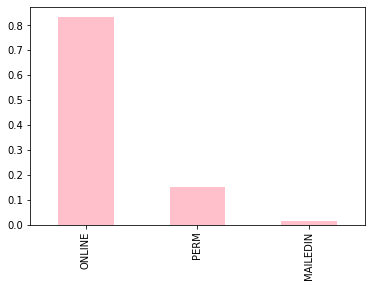

In [232]:
# Percentage of values of each type

## check application_type with case_status

d.application_type.value_counts(normalize=True).plot(kind='bar',color='pink')

We have 63% missing values in application_type


In [31]:
#3  63% missing values -> 63% of 3.74L = 1.34L
d.case_no.nunique()

# all case no. are unique
# 279 values-> no info

134990

In [34]:
#4 -> 36% null values
d.case_received_date.nunique()
# fiscal year from sept to oct

2180

In [48]:
d.case_received_date.unique()

array([                          'NaT', '2013-11-19T00:00:00.000000000',
       '2013-11-12T00:00:00.000000000', ...,
       '2016-12-28T00:00:00.000000000', '2016-12-29T00:00:00.000000000',
       '2016-12-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [77]:
d.case_received_date[d.case_received_date==np.nan]

Series([], Name: case_received_date, dtype: datetime64[ns])

In [46]:
d.case_received_date.value_counts()

2014-06-30    767
2015-09-30    696
2015-06-30    695
2015-06-29    691
2016-06-29    670
             ... 
2011-12-07      1
2010-05-19      1
2009-05-06      1
2008-10-29      1
2010-07-14      1
Name: case_received_date, Length: 2180, dtype: int64

In [68]:
np.dtype(d["case_received_date"])

dtype('<M8[ns]')

In [76]:
d.case_received_date.isnull().sum()

135271

In [273]:
d[d.duplicated()==True]

### we can drop duplicates

,agent_state,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_num_employees,employer_yr_estab,...,job_title,job_training,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay
135273,NC,NaN,NaN,2013-11-12,Denied,H-1B,SOUTH KOREA,2015-06-26,350.0,1988.0,...,Catfish Processor,N,MISSISSIPPI,Year,16973.0,Level I,OES,NaN,16973,Year
135277,NC,NaN,NaN,2013-11-12,Denied,H-1B,SOUTH KOREA,2015-05-18,350.0,1988.0,...,Catfish Processor,N,MISSISSIPPI,Year,16973.0,Level I,OES,NaN,16973,Year
135278,NC,NaN,NaN,2013-11-12,Denied,H-1B,SOUTH KOREA,2015-05-18,350.0,1988.0,...,Catfish Processor,N,MISSISSIPPI,Year,16973.0,Level I,OES,NaN,16973,Year
135284,NC,NaN,NaN,2013-11-12,Denied,H-1B,SOUTH KOREA,2015-05-18,350.0,1988.0,...,Catfish Processor,N,MISSISSIPPI,Year,16973.0,Level I,OES,NaN,16973,Year
135301,NC,NaN,NaN,2013-11-11,Denied,H-1B,SOUTH KOREA,2015-05-20,350.0,1988.0,...,Catfish Processor,N,MISSISSIPPI,Year,16973.0,Level I,OES,NaN,16973,Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374240,MI,NaN,NaN,2016-10-13,Certified,H-1B,INDIA,2016-12-30,1200.0,1990.0,...,Sr. Systems Analyst,N,NJ,Year,123490.0,Level IV,OES,NaN,123490,Year
374280,CA,NaN,NaN,2016-10-19,Certified,Not in USA,PHILIPPINES,2016-12-30,285.0,1997.0,...,Caregiver,N,AL,Year,17618.0,Level II,OES,NaN,17618,Year
374300,nan,NaN,NaN,2016-10-21,Certified,H-1B,VIETNAM,2016-12-30,950.0,2012.0,...,Poultry Processor,N,GA,Year,20654.0,Level I,OES,NaN,20654,Year
374311,nan,NaN,NaN,2016-10-24,Certified,F-1,SOUTH KOREA,2016-12-30,950.0,2012.0,...,Poultry Processor,N,GA,Year,20654.0,Level I,OES,NaN,20654,Year


In [78]:
#5 - > Target Variable

d.case_status.value_counts(normalize=True)

Certified            0.485981
Certified-Expired    0.396905
Denied               0.068514
Withdrawn            0.048600
Name: case_status, dtype: float64

We can see the percentages of classes in the Target variable

In [80]:
#6
# 6% null values
d.class_of_admission.unique()

array(['J-1', 'B-2', 'H-1B', 'L-1', 'EWI', 'E-2', nan, 'E-1', 'H-2B',
       'TPS', 'F-1', 'B-1', 'C-1', 'Not in USA', 'TN', 'H-4', 'O-1',
       'R-1', 'L-2', 'Q', 'F-2', 'H-1B1', 'Parolee', 'G-5', 'E-3', 'H-2A',
       'VWT', 'P-1', 'A1/A2', 'D-1', 'A-3', 'R-2', 'H-1C', 'H-3', 'J-2',
       'P-4', 'I', 'H-1A', 'G-1', 'VWB', 'G-4', 'P-3', 'AOS/H-1B', 'O-3',
       'Parol', 'O-2', 'H1B', 'N', 'T-1', 'TD', 'M-1', 'K-1', 'U-1',
       'AOS', 'P-2', 'C-3', 'V-2', 'M-2'], dtype=object)

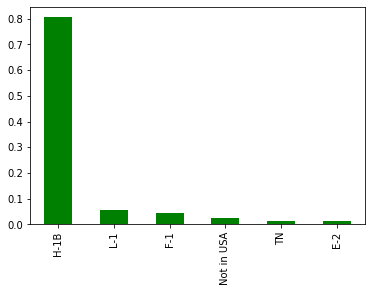

In [234]:
# VAlues of class_of_admsn having more than 1% weightage in the entire dataset

d.class_of_admission.value_counts(normalize=True)[d.class_of_admission.value_counts(normalize=True)>0.01].plot(kind='bar',color='green')

In [94]:
#7 -> 0.01 % missing values
# Applications from 202 countires have been received
d.country_of_citizenship.nunique()

202

In [ ]:
d.dup

In [101]:
#d.country_of_citizenship.unique()

In [269]:
d.country_of_citizenship.unique()

array(['ARMENIA', 'POLAND', 'INDIA', 'SOUTH KOREA', 'CANADA', 'ECUADOR',
       'MEXICO', 'PAKISTAN', 'SINGAPORE', 'RUSSIA', 'VENEZUELA', 'JAPAN',
       'SOUTH AFRICA', 'CHINA', 'PHILIPPINES', 'TURKEY', 'VIETNAM',
       'EL SALVADOR', 'IRAN', 'CAMEROON', 'JAMAICA', 'INDONESIA',
       'SWEDEN', 'PORTUGAL', 'COLOMBIA', 'BRAZIL', 'TRINIDAD AND TOBAGO',
       'GUATEMALA', 'BANGLADESH', 'MONGOLIA', 'SPAIN', 'MOROCCO',
       'UNITED STATES OF AMERICA', 'NIGERIA', 'BOLIVIA', 'AUSTRIA',
       'ISRAEL', 'ITALY', 'ARGENTINA', 'IRELAND', 'BULGARIA', 'EGYPT',
       'TAIWAN', 'UNITED KINGDOM', 'SLOVAKIA', 'DOMINICAN REPUBLIC',
       'NEPAL', 'KENYA', 'ROMANIA', 'MALAYSIA', 'UNITED ARAB EMIRATES',
       'SRI LANKA', 'PERU', 'FRANCE', 'UKRAINE', 'HUNGARY', 'MACEDONIA',
       'PANAMA', 'PARAGUAY', 'HONG KONG', 'KUWAIT', 'CHILE', 'COSTA RICA',
       'GERMANY', 'GEORGIA', 'AUSTRALIA', 'MOLDOVA', 'LEBANON',
       'BARBADOS', 'NEW ZEALAND', 'NETHERLANDS', 'JORDAN', 'IVORY COAST',
       'THAIL

In [96]:
# Major countries from where the applications were received.  
d.country_of_citizenship.value_counts(normalize=True)[d.country_of_citizenship.value_counts(normalize=True)>0.01]

INDIA             0.548108
CHINA             0.077106
SOUTH KOREA       0.066152
CANADA            0.039551
MEXICO            0.023941
PHILIPPINES       0.023059
UNITED KINGDOM    0.013283
TAIWAN            0.011149
PAKISTAN          0.010585
Name: country_of_citizenship, dtype: float64

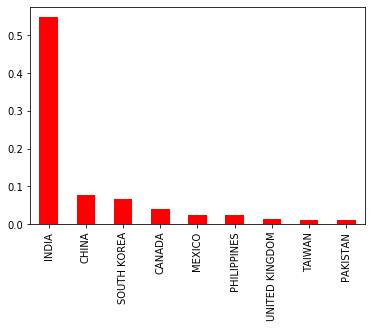

In [98]:
d.country_of_citizenship.value_counts(normalize=True)[d.country_of_citizenship.value_counts(normalize=True)>0.01].plot(kind='bar',color='red')
plt.show()

In [99]:
d.country_of_citizenship.isnull().sum()

60

In [102]:
#8 -> no missing values
d.decision_date.nunique()

1450

In [110]:
#9 -> We have 8384 unique values of city of employer
d.employer_city.unique()

array(['NEW YORK', 'CARLSTADT', 'GLEN ALLEN', ..., 'austin',
       'Carson City', 'Northfield'], dtype=object)

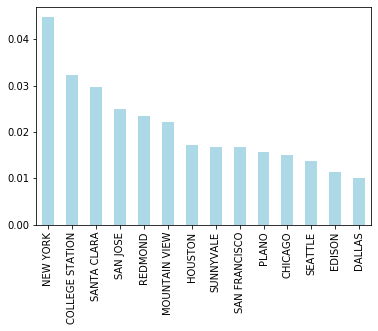

In [236]:
#Major employer cities have more than 1 % weightage in the dataset
d.employer_city.value_counts(normalize=True)[d.employer_city.value_counts(normalize=True)>0.01].plot(kind='bar',color='lightblue')

In [238]:
#10 -  71000 unique values
d.employer_name.unique()

array(['NETSOFT USA INC.', 'PINNACLE ENVIRONEMNTAL CORP',
       'SCHNABEL ENGINEERING, INC.', ...,
       'UNION DENTAL GROUP ANAHEIM, INC.', 'AMPHION GLOBAL INC',
       'Zen Sushi, Inc'], dtype=object)

In [116]:
#11 -> 36% null values
d.employer_num_employees.nunique()

4559

In [119]:
d.employer_num_employees.value_counts().head()

29000.0    4581
35000.0    4417
60000.0    3921
40000.0    2647
5.0        2615
Name: employer_num_employees, dtype: int64

In [121]:
#12 - 113 states
d.employer_state.unique()
# We have redundant information in form of codes and full name of states. They need to be combined.

array(['NY', 'VA', 'FL', 'DE', 'MD', 'NJ', 'GA', 'IL', 'TX', 'KY', 'WY',
       'OH', 'MS', 'MA', 'NC', 'CA', 'MO', 'CT', 'AZ', 'WI', 'PA', 'WA',
       'CO', 'MN', 'NV', 'UT', 'AL', 'OK', 'LA', 'RI', 'DC', 'OR', 'MI',
       'IA', 'NH', 'IN', 'SD', nan, 'NE', 'KS', 'TN', 'PR', 'AR', 'GU',
       'WV', 'SC', 'ID', 'VI', 'ND', 'HI', 'VT', 'ME', 'NM', 'MP', 'AK',
       'MT', 'GEORGIA', 'NEW YORK', 'TEXAS', 'CALIFORNIA', 'WASHINGTON',
       'NEW JERSEY', 'ARIZONA', 'NORTH CAROLINA', 'WISCONSIN',
       'LOUISIANA', 'MAINE', 'OHIO', 'MARYLAND', 'MASSACHUSETTS',
       'MICHIGAN', 'ILLINOIS', 'PENNSYLVANIA', 'VERMONT', 'VIRGINIA',
       'FLORIDA', 'MISSOURI', 'ARKANSAS', 'NEW HAMPSHIRE', 'INDIANA',
       'OKLAHOMA', 'UTAH', 'CONNECTICUT', 'SOUTH DAKOTA', 'DELAWARE',
       'ALABAMA', 'WEST VIRGINIA', 'NEBRASKA', 'OREGON', 'COLORADO',
       'RHODE ISLAND', 'KANSAS', 'ALASKA', 'DISTRICT OF COLUMBIA',
       'MINNESOTA', 'TENNESSEE', 'KENTUCKY', 'GUAM', 'IOWA', 'NEW MEXICO',
       'NORTH

In [126]:
#13 -> 36% null values
d.employer_yr_estab.nunique()

# we have values of years ranging from 0 to 2016

262

In [129]:
#14 -> 36% missing values
d.foreign_worker_info_education.unique()

array([nan, "Bachelor's", 'None', 'Doctorate', "Master's", 'Other',
       'High School', "Associate's"], dtype=object)

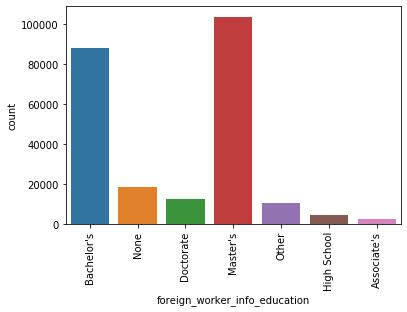

In [131]:
sns.countplot(d.foreign_worker_info_education)
plt.xticks(rotation=90)
plt.show()

In [134]:
#15-> 41% missing - 21851 unique values
d.foreign_worker_info_major.unique()

array([nan, 'MECHANICAL ENGINEERING', 'MOLECULAR BIOLOGY', ...,
       'INDUSTRIAL TRIBOLOGY & MAINTENANCE ENGINEERING',
       'SECONDARY EDUCATION WITHOUT TEACHING LICENSURE',
       'BUSINESS ADMINISTRATION AND LOGISTICS'], dtype=object)

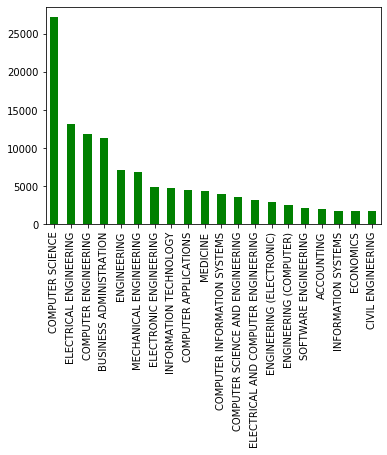

In [143]:
d.foreign_worker_info_major.value_counts().head(20).plot(kind='bar',color='green')

These values can be clubbed . Like all engineering streams can be put under one label

In [146]:
#16 - 36% missing values
d.job_experience.value_counts(normalize=True)

Y    0.556493
N    0.443507
Name: job_experience, dtype: float64

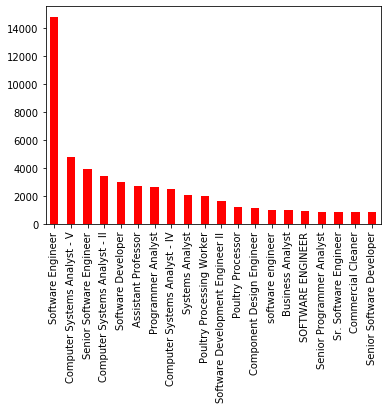

In [149]:
#17- > 36% missing values
d.job_title.value_counts().head(20).plot(kind='bar',color='red')

We have over 50,000 job titles here, which can be clubbed according to a generalized work sector.

In [152]:
#18 - 36% missing values
d.job_training.value_counts(normalize=True)

N    0.981429
Y    0.018571
Name: job_training, dtype: float64

In [156]:
#19  - 113 unique values
d.job_work_state.nunique()

# We have redundant information in form of codes and full name of states. They need to be combined. 

113

In [161]:
#20- > 2% null values
d.pv_unit_of_pay_9089.value_counts()

Year         336024
yr            19757
Hour           7446
hr              726
Week            179
Month           121
Bi-Weekly        23
wk               21
mth               7
bi                5
Name: pv_unit_of_pay_9089, dtype: int64

In [163]:
d.pv_unit_of_pay_9089.replace('yr','Year',inplace=True)

In [165]:
d.pv_unit_of_pay_9089.replace('hr','Hour',inplace=True)
d.pv_unit_of_pay_9089.replace('bi','Bi-Weekly',inplace=True)
d.pv_unit_of_pay_9089.replace('mth','Month',inplace=True)
d.pv_unit_of_pay_9089.replace('wk','Week',inplace=True)

In [168]:
d.pv_unit_of_pay_9089.value_counts(normalize=True)

Year         0.976591
Hour         0.022432
Week         0.000549
Month        0.000351
Bi-Weekly    0.000077
Name: pv_unit_of_pay_9089, dtype: float64

In [177]:
#21- > 0.5% missing values
d.previous_salary.unique()

array([ 75629.,  37024.,  47923., ...,  44237., 105818., 112354.])

In [186]:
np.dtype(d.previous_salary)

dtype('float64')

In [187]:
# Unable to see this distribution as the values have are in string format,and might have characters in the salary

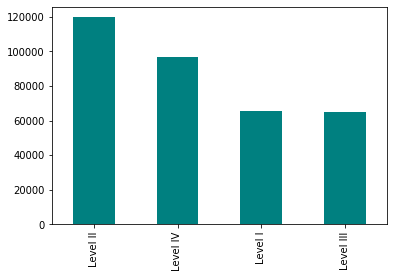

In [196]:
#22 - 7% missing values
d.level.value_counts().plot(kind='bar',color='teal')

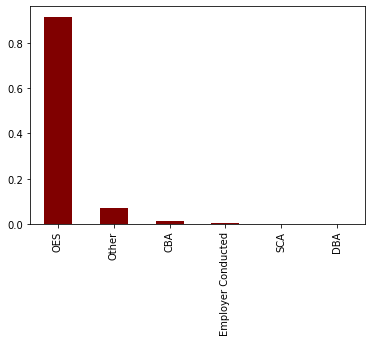

In [200]:
#23- > 0.55 missing values
d.source_name.value_counts(normalize=True).plot(kind='bar',color='maroon')


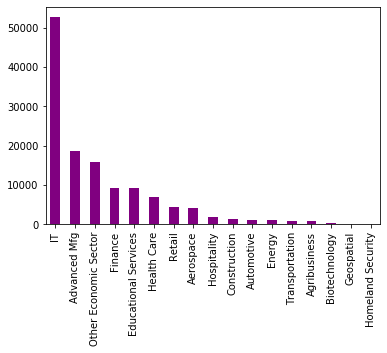

In [204]:
#24
d.sector.value_counts().plot(kind='bar',color='purple')

In [223]:
#25 -30% missing values
d.wage_offer.unique()

array([75629, 37024, 47923, ..., 117420.16, 77119.65, 65610], dtype=object)

In [222]:
d["wage_offer"][d["wage_offer"]=="#############"]

202865    #############
209472    #############
Name: wage_offer, dtype: object

In order to visualize this column, we need to treat it by converting it to integer/float type


In [227]:
#26
d.wage_unit_of_pay.unique()

array(['yr', 'hr', 'mth', 'wk', 'bi', nan, 'Year', 'Hour', 'Week',
       'Month', 'Bi-Weekly'], dtype=object)

In [228]:
d.wage_unit_of_pay.replace('hr','Hour',inplace=True)
d.wage_unit_of_pay.replace('bi','Bi-Weekly',inplace=True)
d.wage_unit_of_pay.replace('mth','Month',inplace=True)
d.wage_unit_of_pay.replace('wk','Week',inplace=True)
d.wage_unit_of_pay.replace('yr','Year',inplace=True)

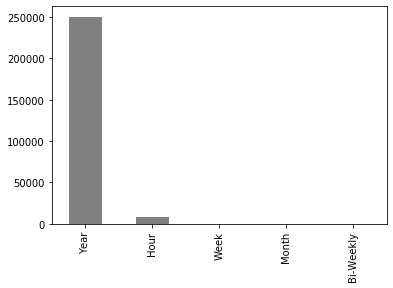

In [229]:
d.wage_unit_of_pay.value_counts().plot(kind='bar',color='grey')

## Missing value Treatment
#### missing values in columns with upto 10%  missing values are imputed

In [242]:
d.columns

Index(['agent_state', 'application_type', 'case_no', 'case_received_date',
       'case_status', 'class_of_admission', 'country_of_citizenship',
       'decision_date', 'employer_num_employees', 'employer_yr_estab',
       'employer_city', 'employer_name', 'employer_state',
       'foreign_worker_info_education', 'foreign_worker_info_major',
       'job_experience', 'job_title', 'job_training', 'job_work_state',
       'pv_unit_of_pay_9089', 'previous_salary', 'level', 'source_name',
       'sector', 'wage_offer', 'wage_unit_of_pay'],
      dtype='object')

In [243]:
d.agent_state.unique()

array([nan, 'WISCONSIN', 'NORTH CAROLINA', 'COLORADO', 'CALIFORNIA',
       'MICHIGAN', 'NEW YORK', 'TEXAS', 'PENNSYLVANIA', 'NEW JERSEY',
       'MISSOURI', 'FLORIDA', 'VIRGINIA', 'OHIO', 'DISTRICT OF COLUMBIA',
       'INDIANA', 'GEORGIA', 'MASSACHUSETTS', 'ILLINOIS', 'ALABAMA',
       'OKLAHOMA', 'WASHINGTON', 'CONNECTICUT', 'MINNESOTA', 'ARKANSAS',
       'HAWAII', 'MARYLAND', 'UTAH', 'PUERTO RICO', 'ARIZONA', 'NEVADA',
       'NEW HAMPSHIRE', 'OREGON', 'KANSAS', 'NEW MEXICO', 'VERMONT',
       'TENNESSEE', 'NEBRASKA', 'LOUISIANA', 'KENTUCKY', 'GUAM', 'IOWA',
       'SOUTH CAROLINA', 'RHODE ISLAND', 'MAINE', 'IDAHO', 'NORTH DAKOTA',
       'ALASKA', 'MISSISSIPPI', 'DELAWARE', 'MARSHALL ISLANDS',
       'SOUTH DAKOTA', 'MONTANA', 'WEST VIRGINIA', 'NE', 'FL', 'TX', 'CA',
       'NY', 'GA', 'MA', 'DC', 'IL', 'VA', 'NC', 'MD', 'TN', 'LA', 'NJ',
       'HI', 'PA', 'MI', 'MO', 'WI', 'OK', 'AZ', 'OR', 'MN', 'OH', 'CT',
       'UT', 'SC', 'AL', 'WA', 'IN', 'NH', 'CO', 'VT', 'IA', 'RI', 'ME

In [248]:
state_abbrevs = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Northern Mariana Islands':'MP', 
    'Palau': 'PW', 
    'Puerto Rico': 'PR', 
    'Virgin Islands': 'VI', 
    'District of Columbia': 'DC',
    'MARSHALL ISLANDS':'MH'
}

In [249]:
us_state_abbrev = {k.upper(): v for k, v in state_abbrevs.items()}
d['agent_state'].replace(us_state_abbrev, inplace=True)
d.agent_state = d.agent_state.astype(str)

In [250]:
d.agent_state.unique()

array(['nan', 'WI', 'NC', 'CO', 'CA', 'MI', 'NY', 'TX', 'PA', 'NJ', 'MO',
       'FL', 'VA', 'OH', 'DC', 'IN', 'GA', 'MA', 'IL', 'AL', 'OK', 'WA',
       'CT', 'MN', 'AR', 'HI', 'MD', 'UT', 'PR', 'AZ', 'NV', 'NH', 'OR',
       'KS', 'NM', 'VT', 'TN', 'NE', 'LA', 'KY', 'GUAM', 'IA', 'SC', 'RI',
       'ME', 'ID', 'ND', 'AK', 'MS', 'DE', 'MH', 'SD', 'MT', 'WV', 'GU',
       'MP', 'WY', 'VI'], dtype=object)

In [251]:
us_state_abbrev = {k.upper(): v for k, v in state_abbrevs.items()}
d['employer_state'].replace(us_state_abbrev, inplace=True)
d.employer_state = d.agent_state.astype(str)

In [254]:
d.employer_state.fillna(d.employer_state.mode()[0],inplace=True)

In [256]:
d.class_of_admission.fillna(d.class_of_admission.mode()[0],inplace=True)

In [258]:
d.country_of_citizenship.fillna(d.country_of_citizenship.mode()[0],inplace=True)

In [259]:
d.employer_city.fillna(d.employer_city.mode()[0],inplace=True)

In [260]:
d.job_work_state.fillna(d.job_work_state.mode()[0],inplace=True)

In [262]:
d.pv_unit_of_pay_9089.fillna(d.pv_unit_of_pay_9089.mode()[0],inplace=True)

In [264]:
d.previous_salary.fillna(d.previous_salary.median(),inplace=True)

In [266]:
d.source_name.fillna(d.source_name.mode()[0],inplace=True)
d.level.fillna(d.level.mode()[0],inplace=True)

In [268]:
d.isnull().sum()/3743.62

agent_state                       0.000000
application_type                 63.866792
case_no                          63.866792
case_received_date               36.133742
case_status                       0.000000
class_of_admission                0.000000
country_of_citizenship            0.000000
decision_date                     0.000000
employer_num_employees           36.154578
employer_yr_estab                36.169269
employer_city                     0.000000
employer_name                     0.003205
employer_state                    0.000000
foreign_worker_info_education    36.143893
foreign_worker_info_major        41.396296
job_experience                   36.136413
job_title                        36.144961
job_training                     36.137215
job_work_state                    0.000000
pv_unit_of_pay_9089               0.000000
previous_salary                   0.000000
level                             0.000000
source_name                       0.000000
sector     

In [283]:
d[(d.pv_unit_of_pay_9089)==(d.wage_unit_of_pay)]

,agent_state,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_num_employees,employer_yr_estab,...,job_title,job_training,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay
0,nan,PERM,A-07323-97014,NaT,Certified,J-1,ARMENIA,2012-02-01,NaN,NaN,...,NaN,NaN,NY,Year,75629.00,Level II,OES,IT,75629,Year
1,nan,PERM,A-07332-99439,NaT,Denied,B-2,POLAND,2011-12-21,NaN,NaN,...,NaN,NaN,NY,Year,37024.00,Level I,OES,Other Economic Sector,37024,Year
2,nan,PERM,A-07333-99643,NaT,Certified,H-1B,INDIA,2011-12-01,NaN,NaN,...,NaN,NaN,MD,Year,47923.00,Level I,OES,Aerospace,47923,Year
3,nan,PERM,A-07339-01930,NaT,Certified,B-2,SOUTH KOREA,2011-12-01,NaN,NaN,...,NaN,NaN,NY,Hour,10.97,Level II,OES,Other Economic Sector,10.97,Hour
4,nan,PERM,A-07345-03565,NaT,Certified,L-1,CANADA,2012-01-26,NaN,NaN,...,NaN,NaN,NY,Year,94890.00,Level IV,OES,Advanced Mfg,100000,Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374357,CA,NaN,NaN,2016-12-29,Withdrawn,H-1B,SOUTH KOREA,2016-12-30,3.0,2014.0,...,Office Assistant,N,CA,Year,28330.00,Level II,OES,NaN,28330,Year
374358,WA,NaN,NaN,2016-12-30,Withdrawn,L-1,VIETNAM,2016-12-30,63000.0,1975.0,...,Software Engineer II,N,MA,Year,107744.00,Level III,OES,NaN,122000,Year
374359,IL,NaN,NaN,2016-12-30,Withdrawn,H-1B,INDIA,2016-12-30,33.0,2010.0,...,Computer Systems Analyst,N,MI,Year,79082.00,Level II,OES,NaN,79082,Year
374360,CA,NaN,NaN,2016-12-30,Withdrawn,B-2,SOUTH KOREA,2016-12-30,16.0,2013.0,...,Accounting Clerk,N,AZ,Year,37981.00,Level III,OES,NaN,37981,Year


In [277]:
255121/d.shape[0]

0.6814820948707401

68 % values of pv.unitpay and wage unit of pay are same.


provided that 30% of wage units are missing .



In [281]:
d[(d.wage_offer)!=(d.previous_salary)]

,agent_state,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_num_employees,employer_yr_estab,...,job_title,job_training,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay
4,nan,PERM,A-07345-03565,NaT,Certified,L-1,CANADA,2012-01-26,NaN,NaN,...,NaN,NaN,NY,Year,94890.00,Level IV,OES,Advanced Mfg,100000,Year
6,nan,PERM,A-07354-06926,NaT,Certified-Expired,H-1B,MEXICO,2011-10-07,NaN,NaN,...,NaN,NaN,NY,Year,47083.33,Level II,OES,Educational Services,47084,Year
10,nan,PERM,A-08057-27232,NaT,Withdrawn,H-1B,INDIA,2012-03-05,NaN,NaN,...,NaN,NaN,MD,Year,59758.00,Level II,OES,IT,60000,Year
11,nan,PERM,A-08058-28001,NaT,Certified,H-1B,SINGAPORE,2012-01-06,NaN,NaN,...,NaN,NaN,NY,Year,46176.00,Level II,OES,Other Economic Sector,50000,Year
13,nan,PERM,A-08085-36053,NaT,Certified,H-1B,INDIA,2011-12-09,NaN,NaN,...,NaN,NaN,GA,Year,74672.00,Level IV,OES,IT,80000,Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374350,TX,NaN,NaN,2016-10-31,Certified,H-1B,INDIA,2016-12-30,4800.0,1998.0,...,Software Engineer,N,OH,Year,69098.00,Level II,OES,NaN,73000,Year
374352,NY,NaN,NaN,2016-10-31,Certified,H-1B,INDIA,2016-12-30,100000.0,1802.0,...,"Assistant Vice President, Divisional Business ...",N,NY,Year,112354.00,Level II,Other,NaN,115000,Year
374354,FL,NaN,NaN,2016-12-22,Withdrawn,H-1B,INDIA,2016-12-30,400.0,1980.0,...,Senior Software Developer,N,TX,Year,100693.00,Level III,OES,NaN,125000,Year
374355,CA,NaN,NaN,2016-12-27,Withdrawn,Not in USA,JAPAN,2016-12-30,5.0,2008.0,...,DEAN,N,CA,Year,67059.00,Level I,OES,NaN,69500,Year


In [279]:
140166/d.shape[0]

0.3744130013195784

37 % of previous salary as exact same as wage offer.

Rest are at a max difference of 4-5000 in value.

30 % of wage offers are missing.

In [293]:
d[d["level"]=='Level I']

,agent_state,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_num_employees,employer_yr_estab,...,job_title,job_training,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay
1,nan,PERM,A-07332-99439,NaT,Denied,B-2,POLAND,2011-12-21,NaN,NaN,...,NaN,NaN,NY,Year,37024.0,Level I,OES,Other Economic Sector,37024,Year
2,nan,PERM,A-07333-99643,NaT,Certified,H-1B,INDIA,2011-12-01,NaN,NaN,...,NaN,NaN,MD,Year,47923.0,Level I,OES,Aerospace,47923,Year
5,nan,PERM,A-07352-06288,NaT,Denied,EWI,ECUADOR,2012-01-26,NaN,NaN,...,NaN,NaN,NY,Year,37024.0,Level I,OES,Other Economic Sector,37024,Year
7,nan,PERM,A-08004-10147,NaT,Denied,E-2,CANADA,2012-02-06,NaN,NaN,...,NaN,NaN,FL,Year,36733.0,Level I,OES,Advanced Mfg,36733,Year
8,nan,PERM,A-08004-10184,NaT,Certified,H-1B,CANADA,2012-02-29,NaN,NaN,...,NaN,NaN,TX,Year,44824.0,Level I,OES,IT,44824,Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374334,MD,NaN,NaN,2016-10-27,Certified,H-1B,TURKMENISTAN,2016-12-30,39.0,2003.0,...,IT Specialist,N,MD,Year,67288.0,Level I,OES,NaN,67288,Year
374341,FL,NaN,NaN,2016-10-28,Certified,H-1B,ITALY,2016-12-30,89.0,2004.0,...,Research Associate,N,FL,Year,46904.0,Level I,OES,NaN,54375,Year
374343,MD,NaN,NaN,2016-10-28,Certified,Not in USA,VIETNAM,2016-12-30,450.0,1988.0,...,Auto Detailer,N,LA,Year,17139.0,Level I,OES,NaN,18720,Year
374346,CA,NaN,NaN,2016-10-28,Certified,H-1B,INDIA,2016-12-30,151.0,2004.0,...,Computer Systems Engineer,N,CA,Year,87422.0,Level I,OES,NaN,87422,Year


In [301]:
d['duration']=d.decision_date-d.case_received_date

In [336]:
d[(d.case_status=='Denied')].head(50)

,agent_state,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_num_employees,employer_yr_estab,...,job_training,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay,duration
1,nan,PERM,A-07332-99439,NaT,Denied,B-2,POLAND,2011-12-21,NaN,NaN,...,NaN,NY,Year,37024.00,Level I,OES,Other Economic Sector,37024,Year,NaT
5,nan,PERM,A-07352-06288,NaT,Denied,EWI,ECUADOR,2012-01-26,NaN,NaN,...,NaN,NY,Year,37024.00,Level I,OES,Other Economic Sector,37024,Year,NaT
7,nan,PERM,A-08004-10147,NaT,Denied,E-2,CANADA,2012-02-06,NaN,NaN,...,NaN,FL,Year,36733.00,Level I,OES,Advanced Mfg,36733,Year,NaT
9,nan,PERM,A-08010-11785,NaT,Denied,E-2,PAKISTAN,2012-03-30,NaN,NaN,...,NaN,NY,Hour,12.86,Level I,OES,Retail,12.86,Hour,NaT
18,nan,PERM,A-08162-60225,NaT,Denied,EWI,MEXICO,2011-10-07,NaN,NaN,...,NaN,NJ,Hour,10.37,Level II,OES,Hospitality,10.37,Hour,NaT
22,nan,PERM,A-08190-68131,NaT,Denied,B-2,SOUTH AFRICA,2012-01-23,NaN,NaN,...,NaN,FL,Hour,21.58,Level II,OES,Hospitality,21.58,Hour,NaT
23,nan,PERM,A-08190-68200,NaT,Denied,EWI,MEXICO,2011-10-12,NaN,NaN,...,NaN,NY,Hour,18.31,Level I,OES,Hospitality,18.31,Hour,NaT
24,nan,PERM,A-08271-91261,NaT,Denied,H-1B,CHINA,2012-02-16,NaN,NaN,...,NaN,KY,Year,72467.00,Level II,OES,NaN,50000,Year,NaT
27,nan,PERM,A-08211-73870,NaT,Denied,EWI,MEXICO,2011-10-11,NaN,NaN,...,NaN,NY,Hour,12.90,Level III,OES,Hospitality,12.9,Hour,NaT
29,nan,PERM,A-08212-74295,NaT,Denied,H-1B,INDIA,2011-11-15,NaN,NaN,...,NaN,OH,Year,77272.00,Level III,OES,IT,77272,Year,NaT
